In [2]:
import pandas as pd


In [3]:
lista = [0,1,3,4,5, float('nan')]

In [4]:
lista

[0, 1, 3, 4, 5, nan]

In [5]:
sum(lista)

nan

In [6]:
dataFrame = pd.DataFrame(lista,columns=['Números'])

In [7]:
dataFrame['Números'].fillna(8)

0    0.0
1    1.0
2    3.0
3    4.0
4    5.0
5    8.0
Name: Números, dtype: float64

In [8]:
dataFrame['Números'].dropna()

0    0.0
1    1.0
2    3.0
3    4.0
4    5.0
Name: Números, dtype: float64

In [9]:
dataFrame['Números'].isna()

0    False
1    False
2    False
3    False
4    False
5     True
Name: Números, dtype: bool

In [10]:
###Filme

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


Matplotlib is building the font cache; this may take a moment.


In [12]:
dataFrame = pd.read_csv('filmes.csv',index_col=0, sep = '|')

In [13]:
dataFrame

,QT_VENDIDA
DT_VENDA,
01/01/14,161
01/02/14,108
01/03/14,111
01/04/14,142
01/05/14,115
...,...
01/04/20,10
01/05/20,29
01/06/20,11


<function matplotlib.pyplot.show(close=None, block=None)>

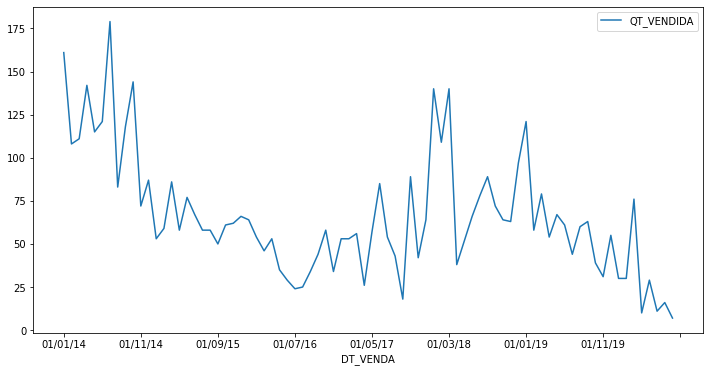

In [14]:
dataFrame.plot(figsize=(12,6))
plt.show

In [15]:
dataFrame.describe()

,QT_VENDIDA
count,80.000000
mean,66.062500
std,35.741811
min,7.000000
25%,43.750000
50%,58.500000
75%,80.000000
max,179.000000


<function matplotlib.pyplot.show(close=None, block=None)>

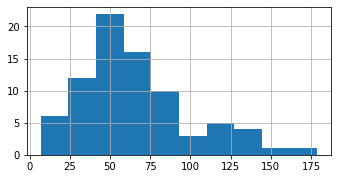

In [16]:
dataFrame.plot(figsize=(12,6))
plt.figure(1)
plt.subplot(221)
dataFrame.QT_VENDIDA.hist()
plt.show

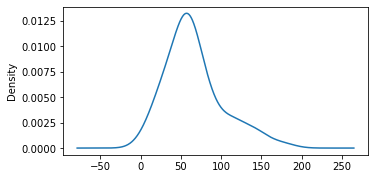

In [17]:
plt.subplot(222)
dataFrame.QT_VENDIDA.plot(kind='kde',figsize=(12,6))
plt.show()

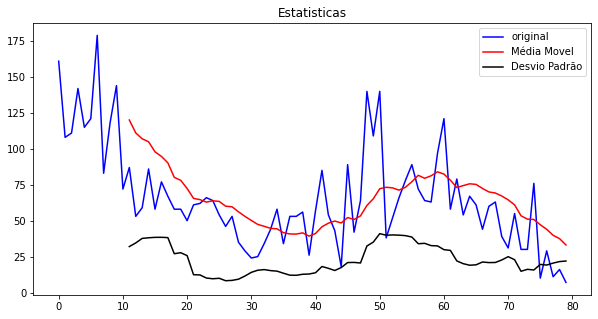

In [18]:
plt.rcParams.update({'figure.figsize':(10,5)})

x= dataFrame.index.values
y=dataFrame['QT_VENDIDA'].values

mediaMovel = pd.DataFrame(y).rolling(window=12).mean()
desvioMovel = pd.DataFrame(y).rolling(window=12).std()

linhasVendas = plt.plot(y, color='blue',label = 'original')
linhasMedia = plt.plot(mediaMovel, color='red',label = 'Média Movel')
linhasMedia = plt.plot(desvioMovel, color='black',label = 'Desvio Padrão')

plt.legend(loc='best')
plt.title('Estatisticas')
plt.show()

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

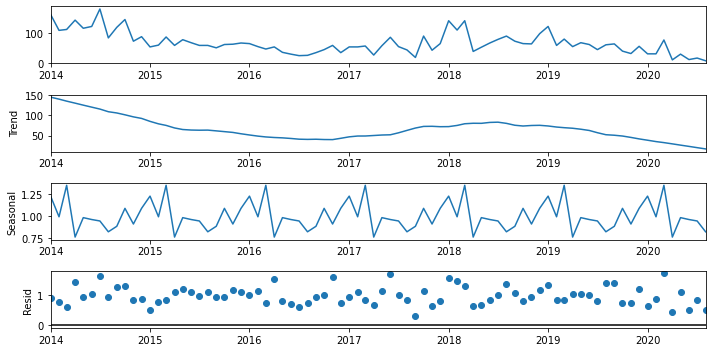

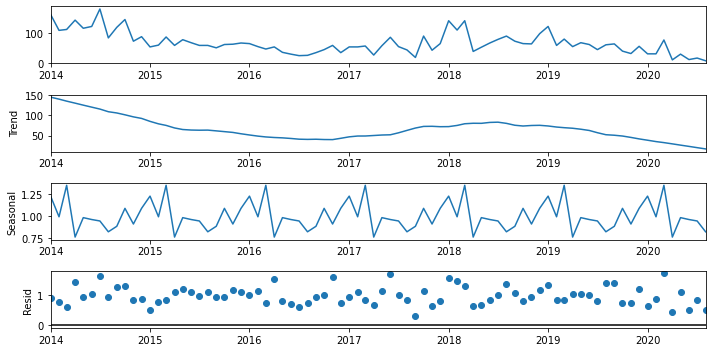

In [20]:
dataFrame.index = pd.to_datetime(dataFrame.index, format = '%d/%m/%y')
decomposicao = sm.tsa.seasonal_decompose(dataFrame,model = 'mul', extrapolate_trend = 'freq')
decomposicao.plot()

In [22]:
dataFrameDecomposicao = pd.concat([decomposicao.seasonal, decomposicao.trend, decomposicao.resid, decomposicao.observed], axis=1)
dataFrameDecomposicao.columns = ['Sazonalidade','Tendência','Resíduo','Vendas']
dataFrameDecomposicao

,Sazonalidade,Tendência,Resíduo,Vendas
DT_VENDA,,,,
2014-01-01,1.228492,145.047494,0.903531,161.0
2014-02-01,0.991132,140.103147,0.777758,108.0
2014-03-01,1.352866,135.158800,0.607049,111.0
2014-04-01,0.758287,130.214452,1.438122,142.0
2014-05-01,0.981337,125.270105,0.935475,115.0
...,...,...,...,...
2020-04-01,0.758287,29.643454,0.444875,10.0
2020-05-01,0.981337,26.530837,1.113855,29.0
2020-06-01,0.959646,23.418221,0.489472,11.0


# Tendência

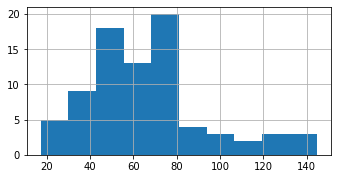

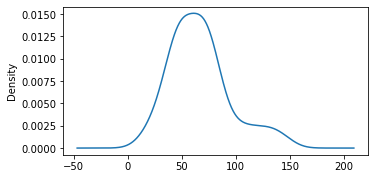

In [37]:

dataFrameDecomposicao.plot(figsize=(12,6))
plt.figure(1)
plt.subplot(221)
dataFrameDecomposicao.Tendência.hist()
plt.show()

plt.subplot(222)
dataFrameDecomposicao.Tendência.plot(kind='kde',figsize=(12,6))
plt.show()

# Sazonalidade

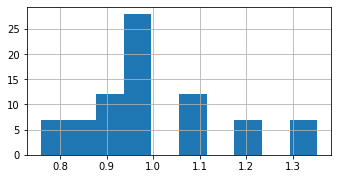

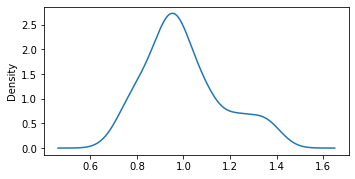

In [38]:

dataFrameDecomposicao.plot(figsize=(12,6))
plt.figure(1)
plt.subplot(221)
dataFrameDecomposicao.Sazonalidade.hist()
plt.show()

plt.subplot(222)
dataFrameDecomposicao.Sazonalidade.plot(kind='kde',figsize=(12,6))
plt.show()

# #Resíduo

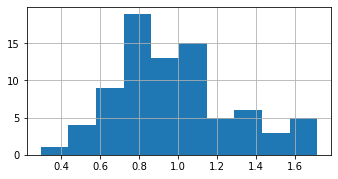

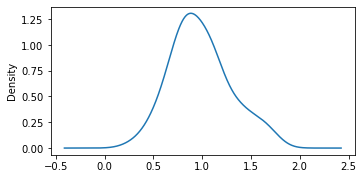

In [39]:
dataFrameDecomposicao.plot(figsize=(12,6))
plt.figure(1)
plt.subplot(221)
dataFrameDecomposicao.Resíduo.hist()
plt.show()

plt.subplot(222)
dataFrameDecomposicao.Resíduo.plot(kind='kde',figsize=(12,6))
plt.show()
